In [3]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing
### C2C Jordan Armstrong
#### Documentation: None.

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis. 

3) Determine distribution of test statistic and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong. 

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Null Hypothesis: Half the voters in El Paso County support Referendum A. 

Alternate Hypothesis: More than half the voters in El Paso County support Referendum A. 

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

Test Statistic:

1) Difference between those who voted for and those would voted against Referendum A
    
    Should be: 0
    Actual: 30
    
2) The number of voters who voted for Referendum A

    Should be: 100
    Actual: 115
    
3) The number of voters who voted against Referendum A
    
    Should be: 100
    Actual: 50
    
We will use the difference of those who for and those who voted against Referendum A

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

It should be 0.

3b) In words (and in the context of this problem), describe what the $p$-value is. 

The $p$-value describes how likely the data is to be distributed in the such way given the null hypothesis is true. Therefore for this problem, the $p$-value is the chance of occurance of the given voter distribution given less than half the voters in El Paso County support Referendum A. It is how likely the data is to be what you observed or weirder. 

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [12]:
#NOTE: I used several python boxes, so don't feel the need to put everything in this box.
test_stat=[]
for _ in np.arange(50000):
    sample=stats.binom.rvs(200, 0.5, size=1)
    test_stat=np.append(test_stat, sample-(200-sample))
test_stat

array([  8.,   4.,   2., ...,  -2.,   6., -14.])

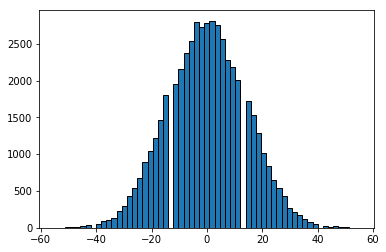

In [24]:
plt.hist(test_stat, np.linspace(-55,55,60))
plt.show()

In [14]:
np.mean(test_stat>30)

0.01444

#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

We reject the null hypothesis. There is sufficent data to show that more than half the voters support Referendum A.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

[Answer Here]

In [22]:
dis = stats.binom.rvs(200,115/200,size = 10000)/200
left = percentile(2.5,dis)
right = percentile(97.5,dis)
print("The left is ", left, " The right is ", right)

The left is  0.505  The right is  0.645


The interval does not contain the value 0.5. This matters as you are trying to show how weird 50% is given the population. Since the sample does not contain 0.5, we would not expect the proporation to be 0.5.